In [24]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import seaborn as sns
import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from gensim.models import Doc2Vec

In [3]:
df=pd.read_csv('after_preprocessing.csv')

In [4]:
data=df[['caption', 'hashtags', 'biography']]

In [5]:
from gensim.models.phrases import Phrases, Phraser

#Caption

In [6]:
sent_cap = [str(row).split() for row in data['caption']]
phrases = Phrases(sent_cap, min_count=30, progress_per=10000)
bigram_cap = Phraser(phrases)
sentences_cap = bigram_cap[sent_cap]

INFO - 14:07:47: collecting all words and their counts
INFO - 14:07:47: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 14:07:48: PROGRESS: at sentence #10000, processed 418087 words and 278239 word types
INFO - 14:07:49: PROGRESS: at sentence #20000, processed 807461 words and 488196 word types
INFO - 14:07:49: PROGRESS: at sentence #30000, processed 1210158 words and 680680 word types
INFO - 14:07:50: PROGRESS: at sentence #40000, processed 1612559 words and 854072 word types
INFO - 14:07:51: collected 923614 word types from a corpus of 1788870 words (unigram + bigrams) and 44159 sentences
INFO - 14:07:51: using 923614 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 14:07:51: source_vocab length 923614
INFO - 14:08:00: Phraser built with 2882 phrasegrams


In [7]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
d2v_model_caption = Doc2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [15]:
t = time()
#d=Doc2Vec()
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

sentences = [TaggedDocument(sentence, 'tag') for sentence in sentences_cap]

d2v_model_caption.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 14:29:26: collecting all words and their counts
INFO - 14:29:26: PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO - 14:29:26: PROGRESS: at example #10000, processed 375856 words (2006753/s), 39009 word types, 3 tags
INFO - 14:29:26: PROGRESS: at example #20000, processed 725579 words (1784910/s), 62739 word types, 3 tags
INFO - 14:29:26: PROGRESS: at example #30000, processed 1085634 words (1802453/s), 82876 word types, 3 tags
INFO - 14:29:27: PROGRESS: at example #40000, processed 1445891 words (1639332/s), 99458 word types, 3 tags
INFO - 14:29:27: collected 105808 word types and 3 unique tags from a corpus of 44159 examples and 1602615 words
INFO - 14:29:27: Loading a fresh vocabulary
INFO - 14:29:27: effective_min_count=20 retains 10103 unique words (9% of original 105808, drops 95705)
INFO - 14:29:27: effective_min_count=20 leaves 1356398 word corpus (84% of original 1602615, drops 246217)
INFO - 14:29:27: deleting the raw counts dictionary of 1058

Time to build vocab: 0.15 mins


In [16]:
t = time()

d2v_model_caption.train(sentences, total_examples=d2v_model_caption.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 14:29:43: training model with 1 workers on 10103 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 14:29:44: EPOCH 1 - PROGRESS: at 10.19% examples, 96473 words/s, in_qsize 1, out_qsize 0
INFO - 14:29:45: EPOCH 1 - PROGRESS: at 19.59% examples, 96853 words/s, in_qsize 2, out_qsize 0
INFO - 14:29:47: EPOCH 1 - PROGRESS: at 28.95% examples, 97580 words/s, in_qsize 1, out_qsize 0
INFO - 14:29:48: EPOCH 1 - PROGRESS: at 39.91% examples, 97581 words/s, in_qsize 1, out_qsize 0
INFO - 14:29:49: EPOCH 1 - PROGRESS: at 50.28% examples, 97372 words/s, in_qsize 1, out_qsize 0
INFO - 14:29:50: EPOCH 1 - PROGRESS: at 60.00% examples, 97337 words/s, in_qsize 2, out_qsize 0
INFO - 14:29:51: EPOCH 1 - PROGRESS: at 69.70% examples, 97286 words/s, in_qsize 1, out_qsize 0
INFO - 14:29:52: EPOCH 1 - PROGRESS: at 79.24% examples, 97536 words/s, in_qsize 1, out_qsize 0
INFO - 14:29:53: EPOCH 1 - PROGRESS: at 90.00% examples, 97823 words/s, in_qsize 1, out_qsize 0
I

Time to train the model: 5.1 mins


In [17]:
d2v_model_caption.wv.most_similar(positive=["good"])

INFO - 14:34:50: precomputing L2-norms of word weight vectors


[('great', 0.54768967628479),
 ('even_better', 0.47865885496139526),
 ('bore', 0.4769342839717865),
 ('damn', 0.468082070350647),
 ('better', 0.46640533208847046),
 ('way_start', 0.4647727310657501),
 ('honest', 0.4573303461074829),
 ('isn’t', 0.45688629150390625),
 ('bad', 0.44805920124053955),
 ('alway', 0.44329553842544556)]

In [18]:
d2v_model_caption.wv.doesnt_match(['good', 'great', 'damn'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'damn'

In [25]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    #plt.savefig('tsne caption.png')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


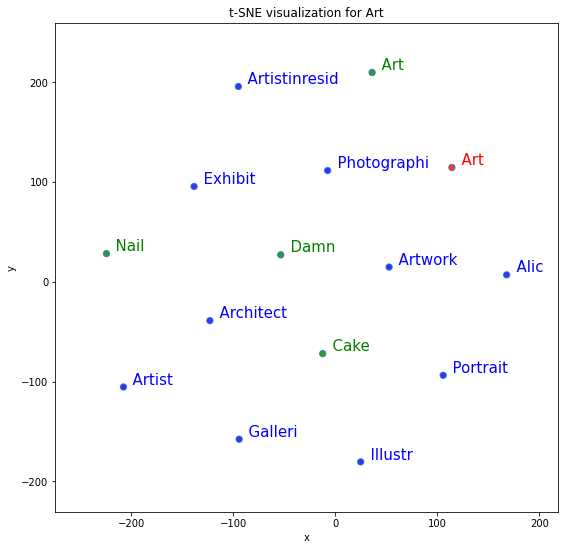

In [26]:
tsnescatterplot(d2v_model_caption, 'art', ['damn', 'cake', 'nail', 'art'])

In [ ]:
tsnescatterplot(d2v_model_caption, 'art', [i[0] for i in d2v_model_caption.wv.most_similar(negative=["art"])])

#Hashtags

In [36]:
new_data=data[data['hashtags']!='[]']
new_data=new_data.drop(['caption', 'biography'], axis=1)


new_data=new_data.apply(lambda x: x.astype(str).str.lstrip('['))
new_data=new_data.apply(lambda x: x.astype(str).str.replace("'",''))
new_data=new_data.apply(lambda x: x.astype(str).str.replace(",",''))
new_data=new_data.apply(lambda x: x.astype(str).str.replace("#",''))
new_data=new_data.apply(lambda x: x.astype(str).str.rstrip(']'))

In [37]:
sent_hash = [str(row).split() for row in new_data['hashtags']]
phrases = Phrases(sent_hash, min_count=30, progress_per=10000)
bigram_hash = Phraser(phrases)
sentences_hash = bigram_hash[sent_hash]
sentences_hash = [TaggedDocument(sentence, 'tag') for sentence in sentences_hash]


INFO - 14:44:20: collecting all words and their counts
INFO - 14:44:20: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 14:44:21: PROGRESS: at sentence #10000, processed 113842 words and 69449 word types
INFO - 14:44:21: PROGRESS: at sentence #20000, processed 219614 words and 122719 word types
INFO - 14:44:21: collected 154178 word types from a corpus of 295590 words (unigram + bigrams) and 26444 sentences
INFO - 14:44:21: using 154178 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 14:44:21: source_vocab length 154178
INFO - 14:44:22: Phraser built with 907 phrasegrams


In [38]:
d2v_model_hash = Doc2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [39]:
t = time()

d2v_model_hash.build_vocab(sentences_hash, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 14:44:27: collecting all words and their counts
INFO - 14:44:27: PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO - 14:44:27: PROGRESS: at example #10000, processed 101749 words (760270/s), 20901 word types, 3 tags
INFO - 14:44:27: PROGRESS: at example #20000, processed 195079 words (775083/s), 34582 word types, 3 tags
INFO - 14:44:27: collected 42029 word types and 3 unique tags from a corpus of 26444 examples and 261405 words
INFO - 14:44:27: Loading a fresh vocabulary
INFO - 14:44:28: effective_min_count=20 retains 2781 unique words (6% of original 42029, drops 39248)
INFO - 14:44:28: effective_min_count=20 leaves 160796 word corpus (61% of original 261405, drops 100609)
INFO - 14:44:28: deleting the raw counts dictionary of 42029 items
INFO - 14:44:28: sample=6e-05 downsamples 2223 most-common words
INFO - 14:44:28: downsampling leaves estimated 86134 word corpus (53.6% of prior 160796)
INFO - 14:44:28: estimated required memory for 2781 words and 

Time to build vocab: 0.02 mins


In [40]:
t = time()

d2v_model_hash.train(sentences_hash, total_examples=d2v_model_hash.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 14:44:30: training model with 1 workers on 2781 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 14:44:31: EPOCH 1 - PROGRESS: at 66.87% examples, 108056 words/s, in_qsize 1, out_qsize 0
INFO - 14:44:32: worker thread finished; awaiting finish of 0 more threads
INFO - 14:44:32: EPOCH - 1 : training on 261405 raw words (165314 effective words) took 1.5s, 109006 effective words/s
INFO - 14:44:33: EPOCH 2 - PROGRESS: at 69.89% examples, 110655 words/s, in_qsize 1, out_qsize 0
INFO - 14:44:33: worker thread finished; awaiting finish of 0 more threads
INFO - 14:44:33: EPOCH - 2 : training on 261405 raw words (165239 effective words) took 1.5s, 109047 effective words/s
INFO - 14:44:34: EPOCH 3 - PROGRESS: at 69.89% examples, 110149 words/s, in_qsize 1, out_qsize 0
INFO - 14:44:35: worker thread finished; awaiting finish of 0 more threads
INFO - 14:44:35: EPOCH - 3 : training on 261405 raw words (165365 effective words) took 1.5s, 110227 effective w

Time to train the model: 1.14 mins


In [41]:
d2v_model_hash.wv.most_similar(positive=["happynewyear"])

INFO - 14:45:51: precomputing L2-norms of word weight vectors


[('celebrate', 0.9347885847091675),
 ('edinburghchristmas', 0.9170191884040833),
 ('bread', 0.8846942186355591),
 ('competition', 0.8843389749526978),
 ('design', 0.8832675218582153),
 ('edinburgh_scotland', 0.8808362483978271),
 ('bristol', 0.8738811016082764),
 ('stockbridge', 0.872738242149353),
 ('champagne', 0.8701140880584717),
 ('saturdayvibes', 0.8623183965682983)]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


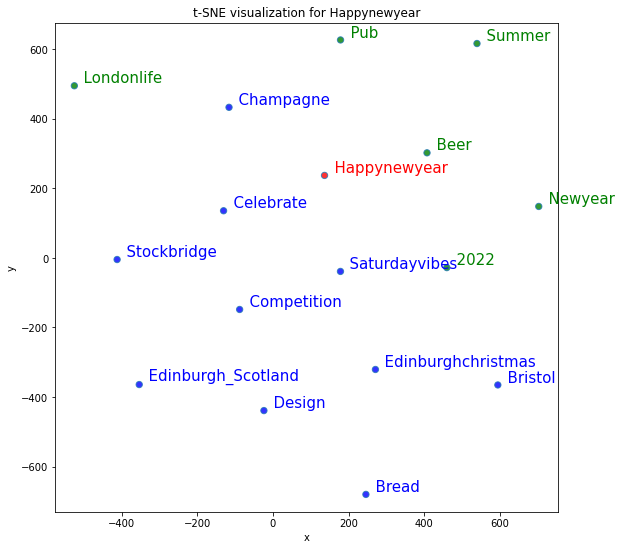

In [43]:
tsnescatterplot(d2v_model_hash, 'happynewyear', ['2022','newyear','summer', 'beer', 'londonlife', 'pub'])

#Biography

In [44]:
sent_bio = [str(row).split() for row in data['biography']]
phrases = Phrases(sent_bio, min_count=30, progress_per=10000)
bigram_bio = Phraser(phrases)
sentences_bio = bigram_bio[sent_bio]
sentences_bio = [TaggedDocument(sentence, 'tag') for sentence in sentences_bio]


INFO - 14:46:19: collecting all words and their counts
INFO - 14:46:19: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 14:46:20: PROGRESS: at sentence #10000, processed 144530 words and 4546 word types
INFO - 14:46:20: PROGRESS: at sentence #20000, processed 282657 words and 7276 word types
INFO - 14:46:20: PROGRESS: at sentence #30000, processed 420143 words and 9023 word types
INFO - 14:46:20: PROGRESS: at sentence #40000, processed 560109 words and 9895 word types
INFO - 14:46:20: collected 10263 word types from a corpus of 617565 words (unigram + bigrams) and 44159 sentences
INFO - 14:46:20: using 10263 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 14:46:20: source_vocab length 10263
INFO - 14:46:20: Phraser built with 1829 phrasegrams


In [45]:
from gensim.models import doc2vec
d2v_model_bio = Doc2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [46]:
t = time()

d2v_model_bio.build_vocab(sentences_bio, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 14:46:25: collecting all words and their counts
INFO - 14:46:25: PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO - 14:46:25: PROGRESS: at example #10000, processed 118994 words (998850/s), 1506 word types, 3 tags
INFO - 14:46:25: PROGRESS: at example #20000, processed 231182 words (974572/s), 2307 word types, 3 tags
INFO - 14:46:26: PROGRESS: at example #30000, processed 342765 words (969307/s), 2775 word types, 3 tags
INFO - 14:46:26: PROGRESS: at example #40000, processed 454786 words (991885/s), 3012 word types, 3 tags
INFO - 14:46:26: collected 3107 word types and 3 unique tags from a corpus of 44159 examples and 500683 words
INFO - 14:46:26: Loading a fresh vocabulary
INFO - 14:46:26: effective_min_count=20 retains 2612 unique words (84% of original 3107, drops 495)
INFO - 14:46:26: effective_min_count=20 leaves 497242 word corpus (99% of original 500683, drops 3441)
INFO - 14:46:26: deleting the raw counts dictionary of 3107 items
INFO - 14:46:2

Time to build vocab: 0.02 mins


In [47]:
t = time()

d2v_model_bio.train(sentences_bio, total_examples=d2v_model_bio.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 14:46:30: training model with 1 workers on 2612 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 14:46:31: EPOCH 1 - PROGRESS: at 34.88% examples, 123771 words/s, in_qsize 1, out_qsize 0
INFO - 14:46:32: EPOCH 1 - PROGRESS: at 71.40% examples, 123018 words/s, in_qsize 1, out_qsize 0
INFO - 14:46:33: worker thread finished; awaiting finish of 0 more threads
INFO - 14:46:33: EPOCH - 1 : training on 500683 raw words (349614 effective words) took 2.9s, 122470 effective words/s
INFO - 14:46:34: EPOCH 2 - PROGRESS: at 34.88% examples, 122569 words/s, in_qsize 1, out_qsize 0
INFO - 14:46:35: EPOCH 2 - PROGRESS: at 71.40% examples, 121564 words/s, in_qsize 1, out_qsize 0
INFO - 14:46:35: worker thread finished; awaiting finish of 0 more threads
INFO - 14:46:35: EPOCH - 2 : training on 500683 raw words (349466 effective words) took 2.9s, 121896 effective words/s
INFO - 14:46:36: EPOCH 3 - PROGRESS: at 34.88% examples, 123764 words/s, in_qsize 1, out_q

Time to train the model: 1.54 mins


INFO - 14:48:08: precomputing L2-norms of word weight vectors
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


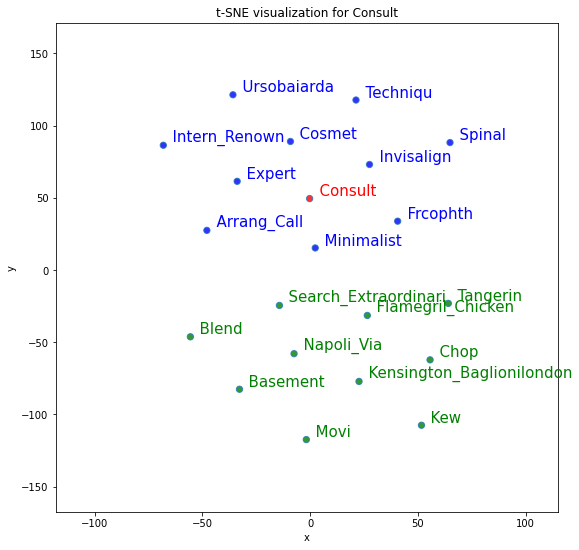

In [49]:
tsnescatterplot(d2v_model_bio, 'consult', [i[0] for i in d2v_model_bio.wv.most_similar(negative=["consult"])])